In [3]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import time 
from IPython.display import clear_output

In [5]:
env = gym.make("FrozenLake-v1")

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [6]:
Q_table = np.zeros((state_space_size, action_space_size))

print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
num_of_episodes = 20000
max_steps_per_episode = 200

learning_rate = 0.01
discount_rate = 0.99

exploration_rate = 1

In [8]:
def choose_action(state):
    random_number = random.uniform(0,1)
    if random_number > exploration_rate:
        action = np.argmax(Q_table[state,:]) 
    else:
        action = env.action_space.sample() 
    return action

In [12]:
rewards_of_all_episodes = []

for episode in range(num_of_episodes):
    state = env.reset()
    action = choose_action(state)
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        state2, reward, done, info = env.step(action)
        
        action2 = choose_action(state2)
        
        # Sarsa update
        Q_table[state, action] = Q_table[state, action] + learning_rate * \
        ((reward + discount_rate * Q_table[state2, action2]) - Q_table[state, action])

        state = state2
        action = action2
        rewards_current_episode = rewards_current_episode + reward
        
        if done == True:
            break
                
    exploration_rate = 1 - np.log(episode + 1) / np.log(num_of_episodes + 1)
    #print(exploration_rate)
        
    rewards_of_all_episodes.append(rewards_current_episode)  

Average reward per thousand episodes 

1000 : 0.108
2000 : 0.172
3000 : 0.25
4000 : 0.31
5000 : 0.325
6000 : 0.347
7000 : 0.384
8000 : 0.407
9000 : 0.417
10000 : 0.471
11000 : 0.509
12000 : 0.528
13000 : 0.526
14000 : 0.536
15000 : 0.61
16000 : 0.597
17000 : 0.662
18000 : 0.674
19000 : 0.718
20000 : 0.722


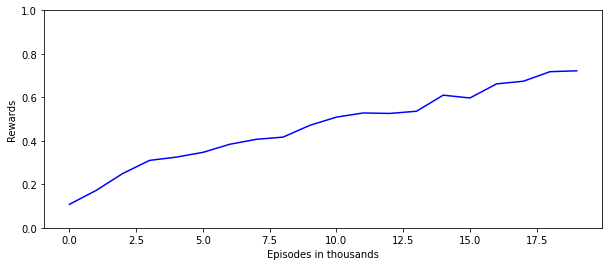



Q Table:
[[0.52986979 0.43496024 0.42945547 0.42063957]
 [0.1609728  0.14961193 0.14510876 0.42828902]
 [0.36384063 0.16150222 0.15649533 0.16367638]
 [0.02352754 0.10362056 0.01289934 0.02276725]
 [0.54695512 0.35808436 0.32532576 0.28203105]
 [0.         0.         0.         0.        ]
 [0.30958613 0.12944993 0.19313638 0.06660894]
 [0.         0.         0.         0.        ]
 [0.33260172 0.32300412 0.3418255  0.57668388]
 [0.38271537 0.63275323 0.39610128 0.33247128]
 [0.6042847  0.42294073 0.31573475 0.22791438]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.34330906 0.4880324  0.73462104 0.38117151]
 [0.62358349 0.85683674 0.77215828 0.71444938]
 [0.         0.         0.         0.        ]]


In [13]:
rewards_per_thousand_episodes = np.split(np.array(rewards_of_all_episodes),
                               num_of_episodes/1000)

reward_value_list = []

count = 1000
print("Average reward per thousand episodes \n")
for i in rewards_per_thousand_episodes:
    print(count, ":", str(sum(i) / 1000))
    
    current_reward_value = sum(i) / 1000
    reward_value_list.append(current_reward_value)
    count = count + 1000
    
    
plt.figure(figsize=(10,4))
plt.ylim(0,1)

plt.plot(reward_value_list, 'b', label='Training loss')
plt.xlabel('Episodes in thousands')
plt.ylabel('Rewards')
#plt.legend()
plt.show()

    

print("\n")
print("Q Table:")
print(Q_table)